# Chapter 10: Sparse matrices and graphs

Robert Johansson

Source code listings for [Numerical Python - A Practical Techniques Approach for Industry](http://www.apress.com/9781484205549) (ISBN 978-1-484205-54-9).

The source code listings can be downloaded from http://www.apress.com/9781484205549

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True

In [3]:
import scipy.sparse as sp

In [4]:
import scipy.sparse.linalg

In [5]:
import numpy as np

In [6]:
import scipy.linalg as la

In [7]:
import networkx as nx

## Coordinate list format

In [8]:
values = [1, 2, 3, 4]

In [9]:
rows = [0, 1, 2, 3]

In [10]:
cols = [1, 3, 2, 0]

In [11]:
A = sp.coo_matrix((values, (rows, cols)), shape=[4, 4])

In [12]:
A.todense()

matrix([[0, 1, 0, 0],
        [0, 0, 0, 2],
        [0, 0, 3, 0],
        [4, 0, 0, 0]])

In [13]:
A

<4x4 sparse matrix of type '<type 'numpy.int64'>'
	with 4 stored elements in COOrdinate format>

In [14]:
A.shape, A.size, A.dtype, A.ndim

((4, 4), 4, dtype('int64'), 2)

In [15]:
A.nnz, A.data

(4, array([1, 2, 3, 4]))

In [16]:
A.row

array([0, 1, 2, 3], dtype=int32)

In [17]:
A.col

array([1, 3, 2, 0], dtype=int32)

In [18]:
A.tocsr()

<4x4 sparse matrix of type '<type 'numpy.int64'>'
	with 4 stored elements in Compressed Sparse Row format>

In [19]:
A.toarray()

array([[0, 1, 0, 0],
       [0, 0, 0, 2],
       [0, 0, 3, 0],
       [4, 0, 0, 0]])

In [20]:
A.todense()

matrix([[0, 1, 0, 0],
        [0, 0, 0, 2],
        [0, 0, 3, 0],
        [4, 0, 0, 0]])

Not all sparse matrix formats supports indexing:

In [21]:
A[1,2]

TypeError: 'coo_matrix' object has no attribute '__getitem__'

In [22]:
A.tobsr()[1,2]

NotImplementedError: 

But some do:

In [23]:
A.tocsr()[1,2]

0

In [24]:
A.tolil()[1:3,3]

<2x1 sparse matrix of type '<type 'numpy.int64'>'
	with 1 stored elements in LInked List format>

## CSR

In [25]:
A = np.array([[1, 2, 0, 0], [0, 3, 4, 0], [0, 0, 5, 6], [7, 0, 8, 9]]); A

array([[1, 2, 0, 0],
       [0, 3, 4, 0],
       [0, 0, 5, 6],
       [7, 0, 8, 9]])

In [26]:
A = sp.csr_matrix(A)

In [27]:
A.data

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [28]:
A.indices

array([0, 1, 1, 2, 2, 3, 0, 2, 3], dtype=int32)

In [29]:
A.indptr

array([0, 2, 4, 6, 9], dtype=int32)

In [30]:
i = 2

In [31]:
A.indptr[i], A.indptr[i+1]-1

(4, 5)

In [32]:
A.indices[A.indptr[i]:A.indptr[i+1]]

array([2, 3], dtype=int32)

In [33]:
A.data[A.indptr[i]:A.indptr[i+1]]

array([5, 6])

## Functions for constructing sparse matrices

In [34]:
N = 10

In [35]:
A = -2 * sp.eye(N) + sp.eye(N, k=1) + sp.eye(N, k=-1)

In [36]:
A

<10x10 sparse matrix of type '<type 'numpy.float64'>'
	with 28 stored elements in Compressed Sparse Row format>

In [37]:
A.todense()

matrix([[-2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 1., -2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  1., -2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  1., -2.,  1.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  1., -2.,  1.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1., -2.,  1.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  1., -2.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  1., -2.,  1.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., -2.,  1.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., -2.]])

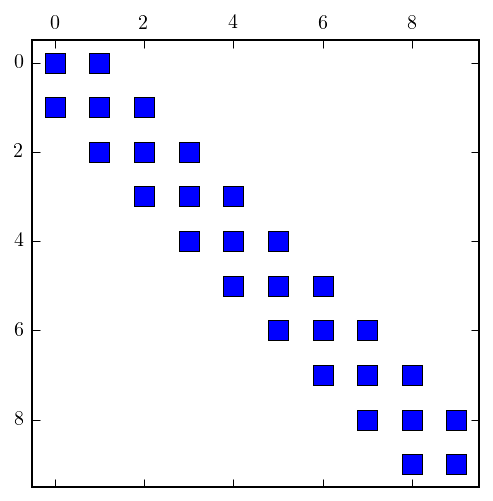

In [38]:
fig, ax = plt.subplots()
ax.spy(A)
fig.savefig("ch10-sparse-matrix-1.pdf");

In [39]:
A = sp.diags([1,-2,1], [1,0,-1], shape=[N, N], format='csc')

In [40]:
A

<10x10 sparse matrix of type '<type 'numpy.float64'>'
	with 28 stored elements in Compressed Sparse Column format>

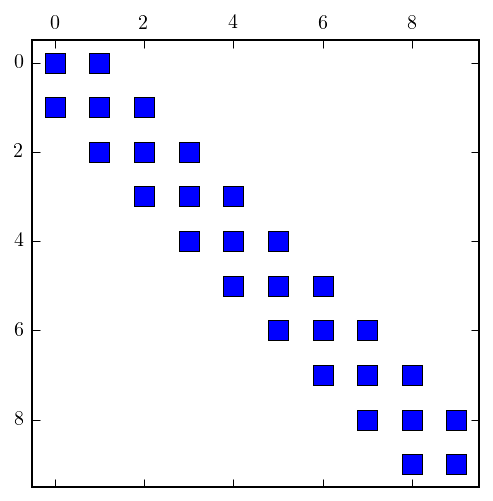

In [41]:
fig, ax = plt.subplots()
ax.spy(A);

In [42]:
B = sp.diags([1, 1], [-1, 1], shape=[3,3])

In [43]:
B

<3x3 sparse matrix of type '<type 'numpy.float64'>'
	with 4 stored elements (2 diagonals) in DIAgonal format>

In [44]:
C = sp.kron(A, B, format='csr')
C

<30x30 sparse matrix of type '<type 'numpy.float64'>'
	with 112 stored elements in Compressed Sparse Row format>

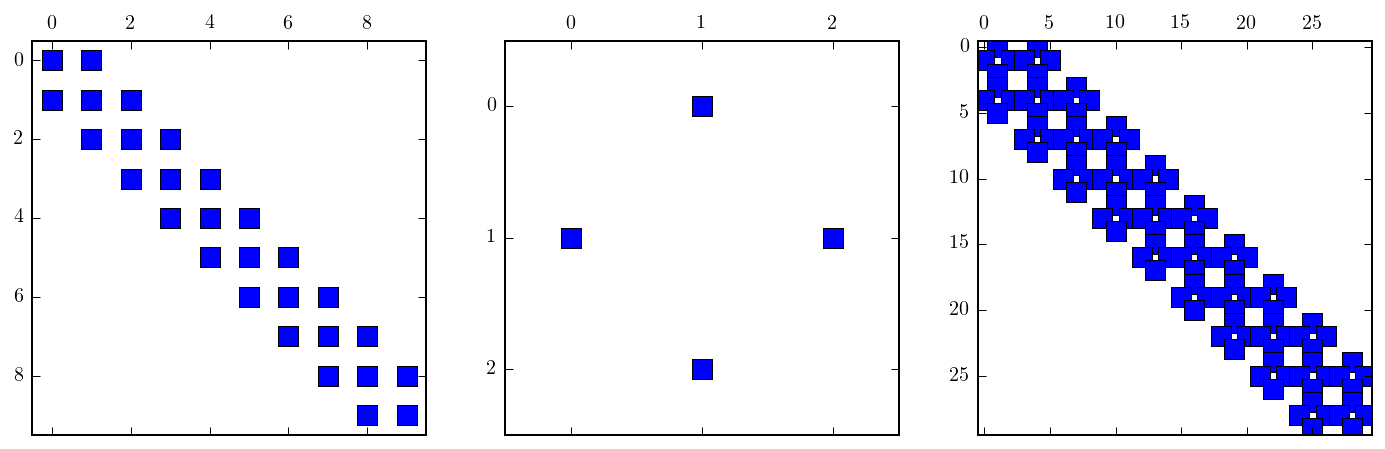

In [45]:
fig, (ax_A, ax_B, ax_C) = plt.subplots(1, 3, figsize=(12, 4))
ax_A.spy(A)
ax_B.spy(B)
ax_C.spy(C)
fig.savefig("ch10-sparse-matrix-2.pdf");

## Sparse linear algebra

In [46]:
N = 10

In [47]:
A = sp.diags([1, -2, 1], [1, 0, -1], shape=[N, N], format='csc')

In [48]:
b = -np.ones(N)

In [49]:
x = sp.linalg.spsolve(A, b)

In [50]:
x

array([  5.,   9.,  12.,  14.,  15.,  15.,  14.,  12.,   9.,   5.])

In [51]:
np.linalg.solve(A.todense(), b)

array([  5.,   9.,  12.,  14.,  15.,  15.,  14.,  12.,   9.,   5.])

In [52]:
lu = sp.linalg.splu(A)

In [53]:
lu.L

<10x10 sparse matrix of type '<type 'numpy.float64'>'
	with 20 stored elements in Compressed Sparse Column format>

In [54]:
lu.perm_r

array([0, 1, 2, 3, 4, 5, 6, 8, 7, 9], dtype=int32)

In [55]:
lu.U

<10x10 sparse matrix of type '<type 'numpy.float64'>'
	with 20 stored elements in Compressed Sparse Column format>

In [56]:
lu.perm_c

array([0, 1, 2, 3, 4, 5, 6, 8, 7, 9], dtype=int32)

In [57]:
def sp_permute(A, perm_r, perm_c):
    """ permute rows and columns of A """
    M, N = A.shape
    # row permumation matrix
    Pr = sp.coo_matrix((np.ones(M), (perm_r, np.arange(N)))).tocsr()
    # column permutation matrix
    Pc = sp.coo_matrix((np.ones(M), (np.arange(M), perm_c))).tocsr()
    return Pr.T * A * Pc.T

In [58]:
lu.L * lu.U - A

<10x10 sparse matrix of type '<type 'numpy.float64'>'
	with 8 stored elements in Compressed Sparse Column format>

In [59]:
sp_permute(lu.L * lu.U, lu.perm_r, lu.perm_c) - A

<10x10 sparse matrix of type '<type 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Column format>

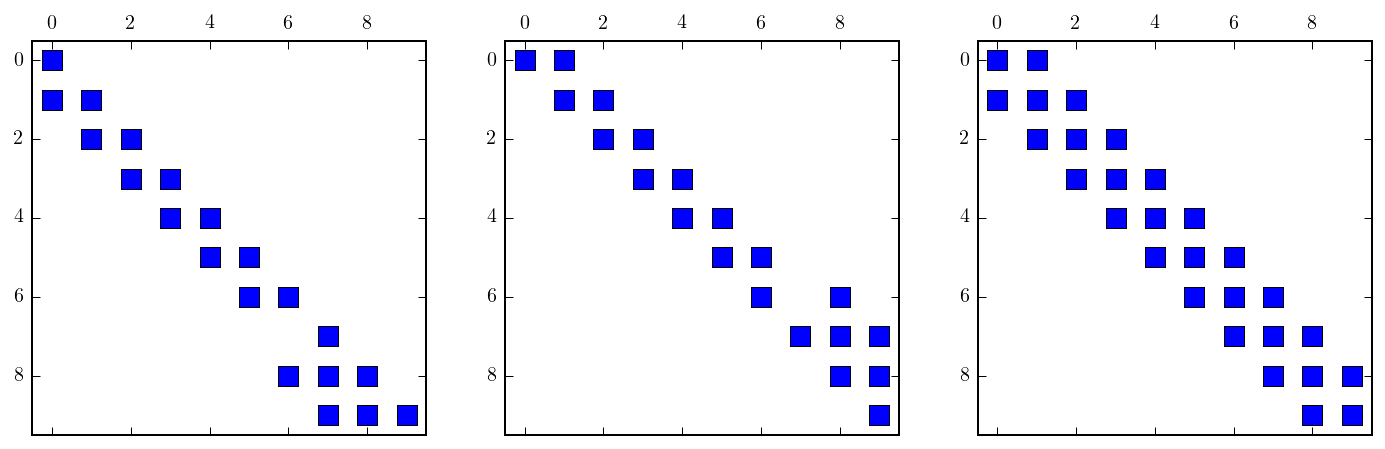

In [60]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
ax1.spy(lu.L)
ax2.spy(lu.U)
ax3.spy(A)

In [61]:
x = lu.solve(b)

In [62]:
x

array([  5.,   9.,  12.,  14.,  15.,  15.,  14.,  12.,   9.,   5.])

In [63]:
# use_umfpack=True is only effective if scikit-umfpack is installed
# (in which case UMFPACK is the default solver)
x = sp.linalg.spsolve(A, b, use_umfpack=True)

In [64]:
x

array([  5.,   9.,  12.,  14.,  15.,  15.,  14.,  12.,   9.,   5.])

In [65]:
x, info = sp.linalg.cg(A, b)

In [66]:
x

array([  5.,   9.,  12.,  14.,  15.,  15.,  14.,  12.,   9.,   5.])

In [67]:
x, info = sp.linalg.bicgstab(A, b)

In [68]:
x

array([  5.,   9.,  12.,  14.,  15.,  15.,  14.,  12.,   9.,   5.])

In [69]:
x, info = sp.linalg.lgmres(A, b)

In [70]:
x

array([  5.,   9.,  12.,  14.,  15.,  15.,  14.,  12.,   9.,   5.])

In [71]:
N = 25

In [72]:
A = sp.diags([1, -2, 1], [8, 0, -8], shape=[N, N], format='csc')

### An example of a matrix reording method: Reverse Cuthil McKee

In [73]:
perm = sp.csgraph.reverse_cuthill_mckee(A)
perm

array([ 7, 15, 23,  1,  9, 17,  2, 10, 18,  3, 11, 19,  4, 12, 20,  5, 13,
       21,  6, 14, 22, 24, 16,  8,  0], dtype=int32)

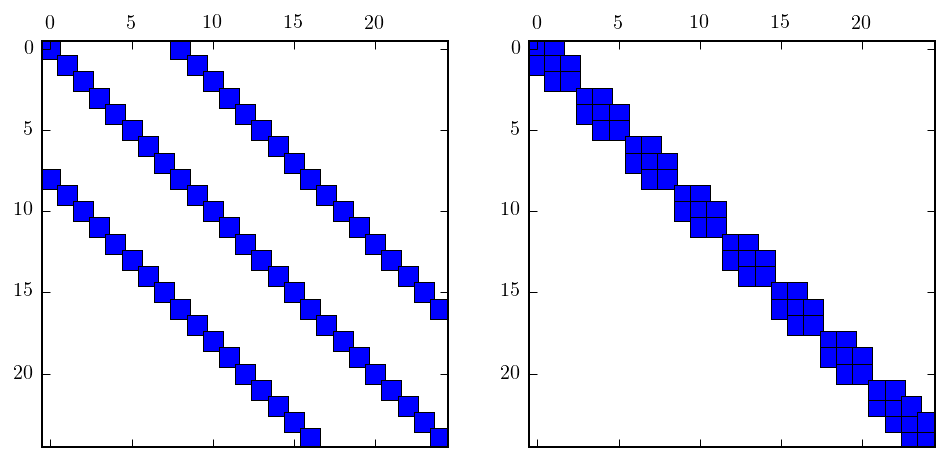

In [74]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.spy(A)
ax2.spy(sp_permute(A, perm, perm))

### Performance comparison sparse/dense

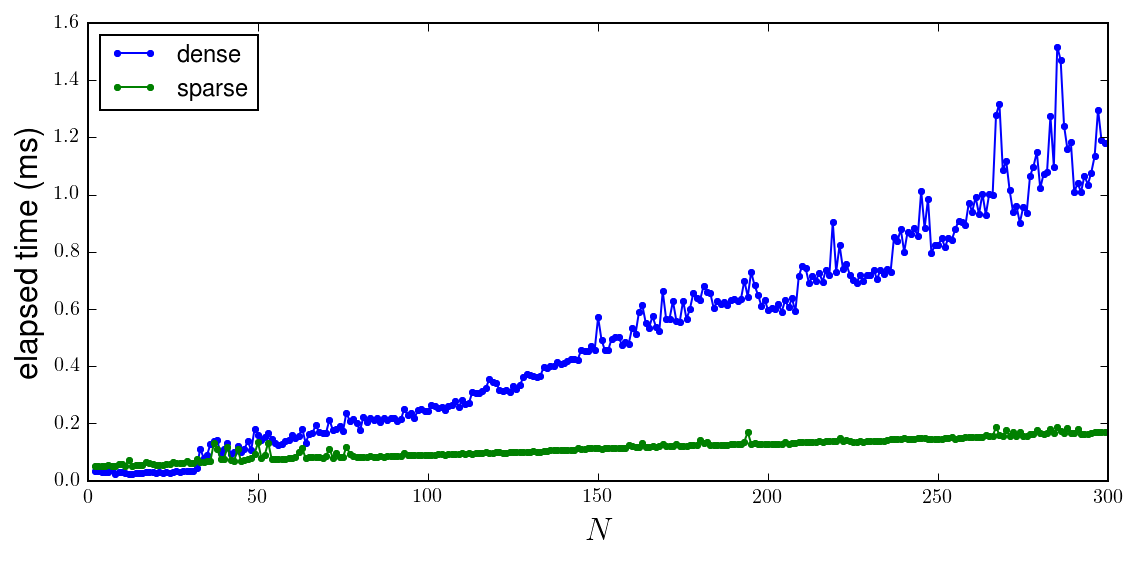

In [75]:
# compare performance of solving Ax=b vs system size N,
# where A is the sparse matrix for the 1d poisson problem
import time

def setup(N):
    A = sp.diags([1,-2,1], [1,0,-1], shape=[N, N], format='csr')
    b = -np.ones(N)
    return A, A.todense(), b

reps = 10
N_vec = np.arange(2, 300, 1)
t_sparse = np.empty(len(N_vec))
t_dense = np.empty(len(N_vec))
for idx, N in enumerate(N_vec):
    A, A_dense, b = setup(N)
    t = time.time()
    for r in range(reps):
        x = np.linalg.solve(A_dense, b)
    t_dense[idx] = (time.time() - t)/reps
    t = time.time()
    for r in range(reps):
        #x = la.solve(A_dense, b)
        x = sp.linalg.spsolve(A, b, use_umfpack=True)
    t_sparse[idx] = (time.time() - t)/reps
    
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(N_vec, t_dense * 1e3, '.-', label="dense")
ax.plot(N_vec, t_sparse * 1e3, '.-', label="sparse")
ax.set_xlabel(r"$N$", fontsize=16)
ax.set_ylabel("elapsed time (ms)", fontsize=16)
ax.legend(loc=0)
fig.tight_layout()
fig.savefig("ch10-sparse-vs-dense.pdf")

### Eigenvalue problems

In [76]:
N = 10

In [77]:
A = sp.diags([1, -2, 1], [1, 0, -1], shape=[N, N], format='csc')

In [78]:
evals, evecs = sp.linalg.eigs(A, k=4, which='LM')

In [79]:
evals

array([-3.91898595+0.j, -3.68250707+0.j, -3.30972147+0.j, -2.83083003+0.j])

In [80]:
np.allclose(A.dot(evecs[:,0]), evals[0] * evecs[:,0])

True

In [81]:
evals, evecs = sp.linalg.eigsh(A, k=4, which='LM')

In [82]:
evals

array([-3.91898595, -3.68250707, -3.30972147, -2.83083003])

In [83]:
evals, evecs = sp.linalg.eigs(A, k=4, which='SR')

In [84]:
evals

array([-3.91898595+0.j, -3.68250707+0.j, -3.30972147+0.j, -2.83083003+0.j])

In [85]:
np.real(evals).argsort()

array([0, 1, 2, 3])

In [86]:
def sp_eigs_sorted(A, k=6, which='SR'):
    """ compute and return eigenvalues sorted by real value """
    evals, evecs = sp.linalg.eigs(A, k=k, which=which)
    idx = np.real(evals).argsort()
    return evals[idx], evecs[idx]

In [87]:
evals, evecs = sp_eigs_sorted(A, k=4, which='SM')

In [88]:
evals

array([-1.16916997+0.j, -0.69027853+0.j, -0.31749293+0.j, -0.08101405+0.j])

#### Random matrix example

In [89]:
N = 100

In [90]:
x_vec = np.linspace(0, 1, 50)

In [91]:
# seed sp.rand with random_state to obtain a reproducible result
M1 = sp.rand(N, N, density=0.2, random_state=112312321)
M2 = sp.rand(N, N, density=0.2, random_state=984592134)

In [92]:
evals = np.array([sp_eigs_sorted((1-x)*M1 + x*M2, k=25)[0] for x in x_vec])

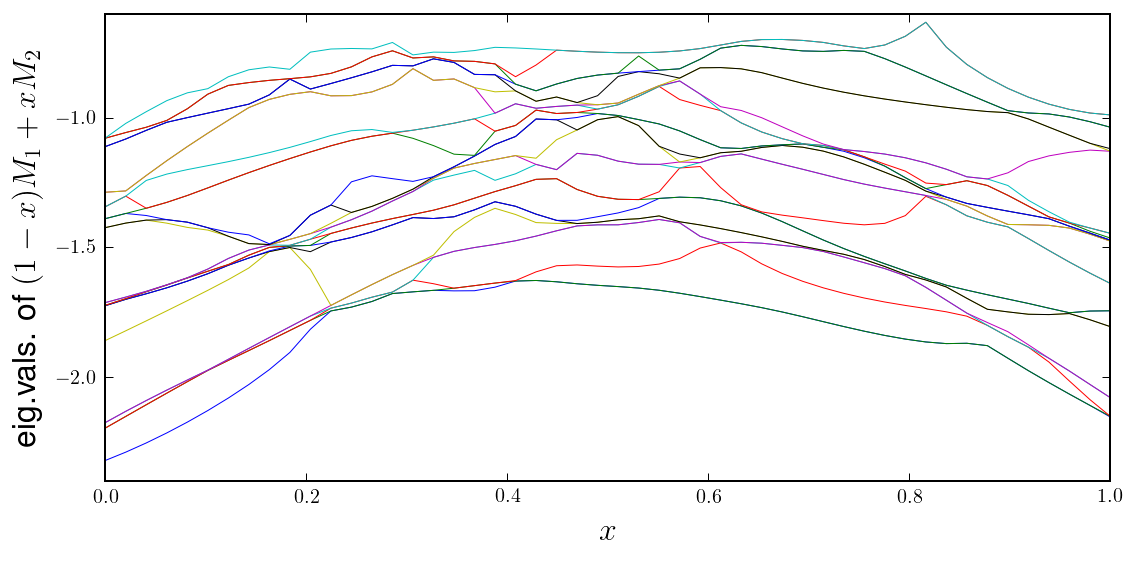

In [93]:
fig, ax = plt.subplots(figsize=(8, 4))

for idx in range(evals.shape[1]):
    ax.plot(x_vec, np.real(evals[:,idx]), lw=0.5)

ax.set_xlabel(r"$x$", fontsize=16)
ax.set_ylabel(r"eig.vals. of $(1-x)M_1+xM_2$", fontsize=16)

fig.tight_layout()
fig.savefig("ch10-sparse-eigs.pdf")

## Graphs

In [94]:
g = nx.MultiGraph()

In [95]:
g.add_node(1)

In [96]:
g.nodes()

[1]

In [97]:
g.add_nodes_from([3, 4, 5])

In [98]:
g.nodes()

[1, 3, 4, 5]

In [99]:
g.add_edge(1, 2)

In [100]:
g.edges()

[(1, 2)]

In [101]:
g.add_edges_from([(3, 4), (5, 6)])

In [102]:
g.edges()

[(1, 2), (3, 4), (5, 6)]

In [103]:
g.add_weighted_edges_from([(1, 3, 1.5), (3, 5, 2.5)])

In [104]:
g.edges(data=True)

[(1, 2, {}),
 (1, 3, {'weight': 1.5}),
 (3, 4, {}),
 (3, 5, {'weight': 2.5}),
 (5, 6, {})]

In [105]:
g.add_weighted_edges_from([(6, 7, 1.5)])

In [106]:
g.nodes()

[1, 2, 3, 4, 5, 6, 7]

In [107]:
g.edges()

[(1, 2), (1, 3), (3, 4), (3, 5), (5, 6), (6, 7)]

In [108]:
import numpy as np

In [109]:
import json

In [110]:
with open("tokyo-metro.json") as f:
    data = json.load(f)

In [111]:
data.keys()

[u'C', u'G', u'F', u'H', u'M', u'N', u'T', u'Y', u'Z']

In [112]:
data["C"]

{u'color': u'#149848',
 u'transfers': [[u'C3', u'F15'],
  [u'C4', u'Z2'],
  [u'C4', u'G2'],
  [u'C7', u'M14'],
  [u'C7', u'N6'],
  [u'C7', u'G6'],
  [u'C8', u'M15'],
  [u'C8', u'H6'],
  [u'C9', u'H7'],
  [u'C9', u'Y18'],
  [u'C11', u'T9'],
  [u'C11', u'M18'],
  [u'C11', u'Z8'],
  [u'C12', u'M19'],
  [u'C18', u'H21']],
 u'travel_times': [[u'C1', u'C2', 2],
  [u'C2', u'C3', 2],
  [u'C3', u'C4', 1],
  [u'C4', u'C5', 2],
  [u'C5', u'C6', 2],
  [u'C6', u'C7', 2],
  [u'C7', u'C8', 1],
  [u'C8', u'C9', 3],
  [u'C9', u'C10', 1],
  [u'C10', u'C11', 2],
  [u'C11', u'C12', 2],
  [u'C12', u'C13', 2],
  [u'C13', u'C14', 2],
  [u'C14', u'C15', 2],
  [u'C15', u'C16', 2],
  [u'C16', u'C17', 3],
  [u'C17', u'C18', 3],
  [u'C18', u'C19', 3]]}

In [113]:
data

{u'C': {u'color': u'#149848',
  u'transfers': [[u'C3', u'F15'],
   [u'C4', u'Z2'],
   [u'C4', u'G2'],
   [u'C7', u'M14'],
   [u'C7', u'N6'],
   [u'C7', u'G6'],
   [u'C8', u'M15'],
   [u'C8', u'H6'],
   [u'C9', u'H7'],
   [u'C9', u'Y18'],
   [u'C11', u'T9'],
   [u'C11', u'M18'],
   [u'C11', u'Z8'],
   [u'C12', u'M19'],
   [u'C18', u'H21']],
  u'travel_times': [[u'C1', u'C2', 2],
   [u'C2', u'C3', 2],
   [u'C3', u'C4', 1],
   [u'C4', u'C5', 2],
   [u'C5', u'C6', 2],
   [u'C6', u'C7', 2],
   [u'C7', u'C8', 1],
   [u'C8', u'C9', 3],
   [u'C9', u'C10', 1],
   [u'C10', u'C11', 2],
   [u'C11', u'C12', 2],
   [u'C12', u'C13', 2],
   [u'C13', u'C14', 2],
   [u'C14', u'C15', 2],
   [u'C15', u'C16', 2],
   [u'C16', u'C17', 3],
   [u'C17', u'C18', 3],
   [u'C18', u'C19', 3]]},
 u'F': {u'color': u'#b96528',
  u'transfers': [[u'F1', u'Y1'],
   [u'F2', u'Y2'],
   [u'F3', u'Y3'],
   [u'F4', u'Y4'],
   [u'F5', u'Y5'],
   [u'F6', u'Y6'],
   [u'F7', u'Y7'],
   [u'F8', u'Y8'],
   [u'F9', u'Y9'],
   [u'F9'

In [114]:
g = nx.Graph()

for line in data.values():
    g.add_weighted_edges_from(line["travel_times"])
    g.add_edges_from(line["transfers"])

In [115]:
for n1, n2 in g.edges_iter():
    g[n1][n2]["transfer"] = "weight" not in g[n1][n2]

In [116]:
g.number_of_nodes()

184

In [117]:
g.nodes()[:5]

[u'Z13', u'N1', u'Y20', u'Y21', u'Y22']

In [118]:
g.number_of_edges()

243

In [119]:
g.edges()[:5]

[(u'Z13', u'Z14'),
 (u'Z13', u'Z12'),
 (u'N1', u'N2'),
 (u'N1', u'T1'),
 (u'Y20', u'Y21')]

In [120]:
on_foot = [edge for edge in g.edges_iter() if g.get_edge_data(*edge)["transfer"]]

In [121]:
on_train = [edge for edge in g.edges_iter() if not g.get_edge_data(*edge)["transfer"]]

In [122]:
colors = [data[n[0].upper()]["color"] for n in g.nodes()]

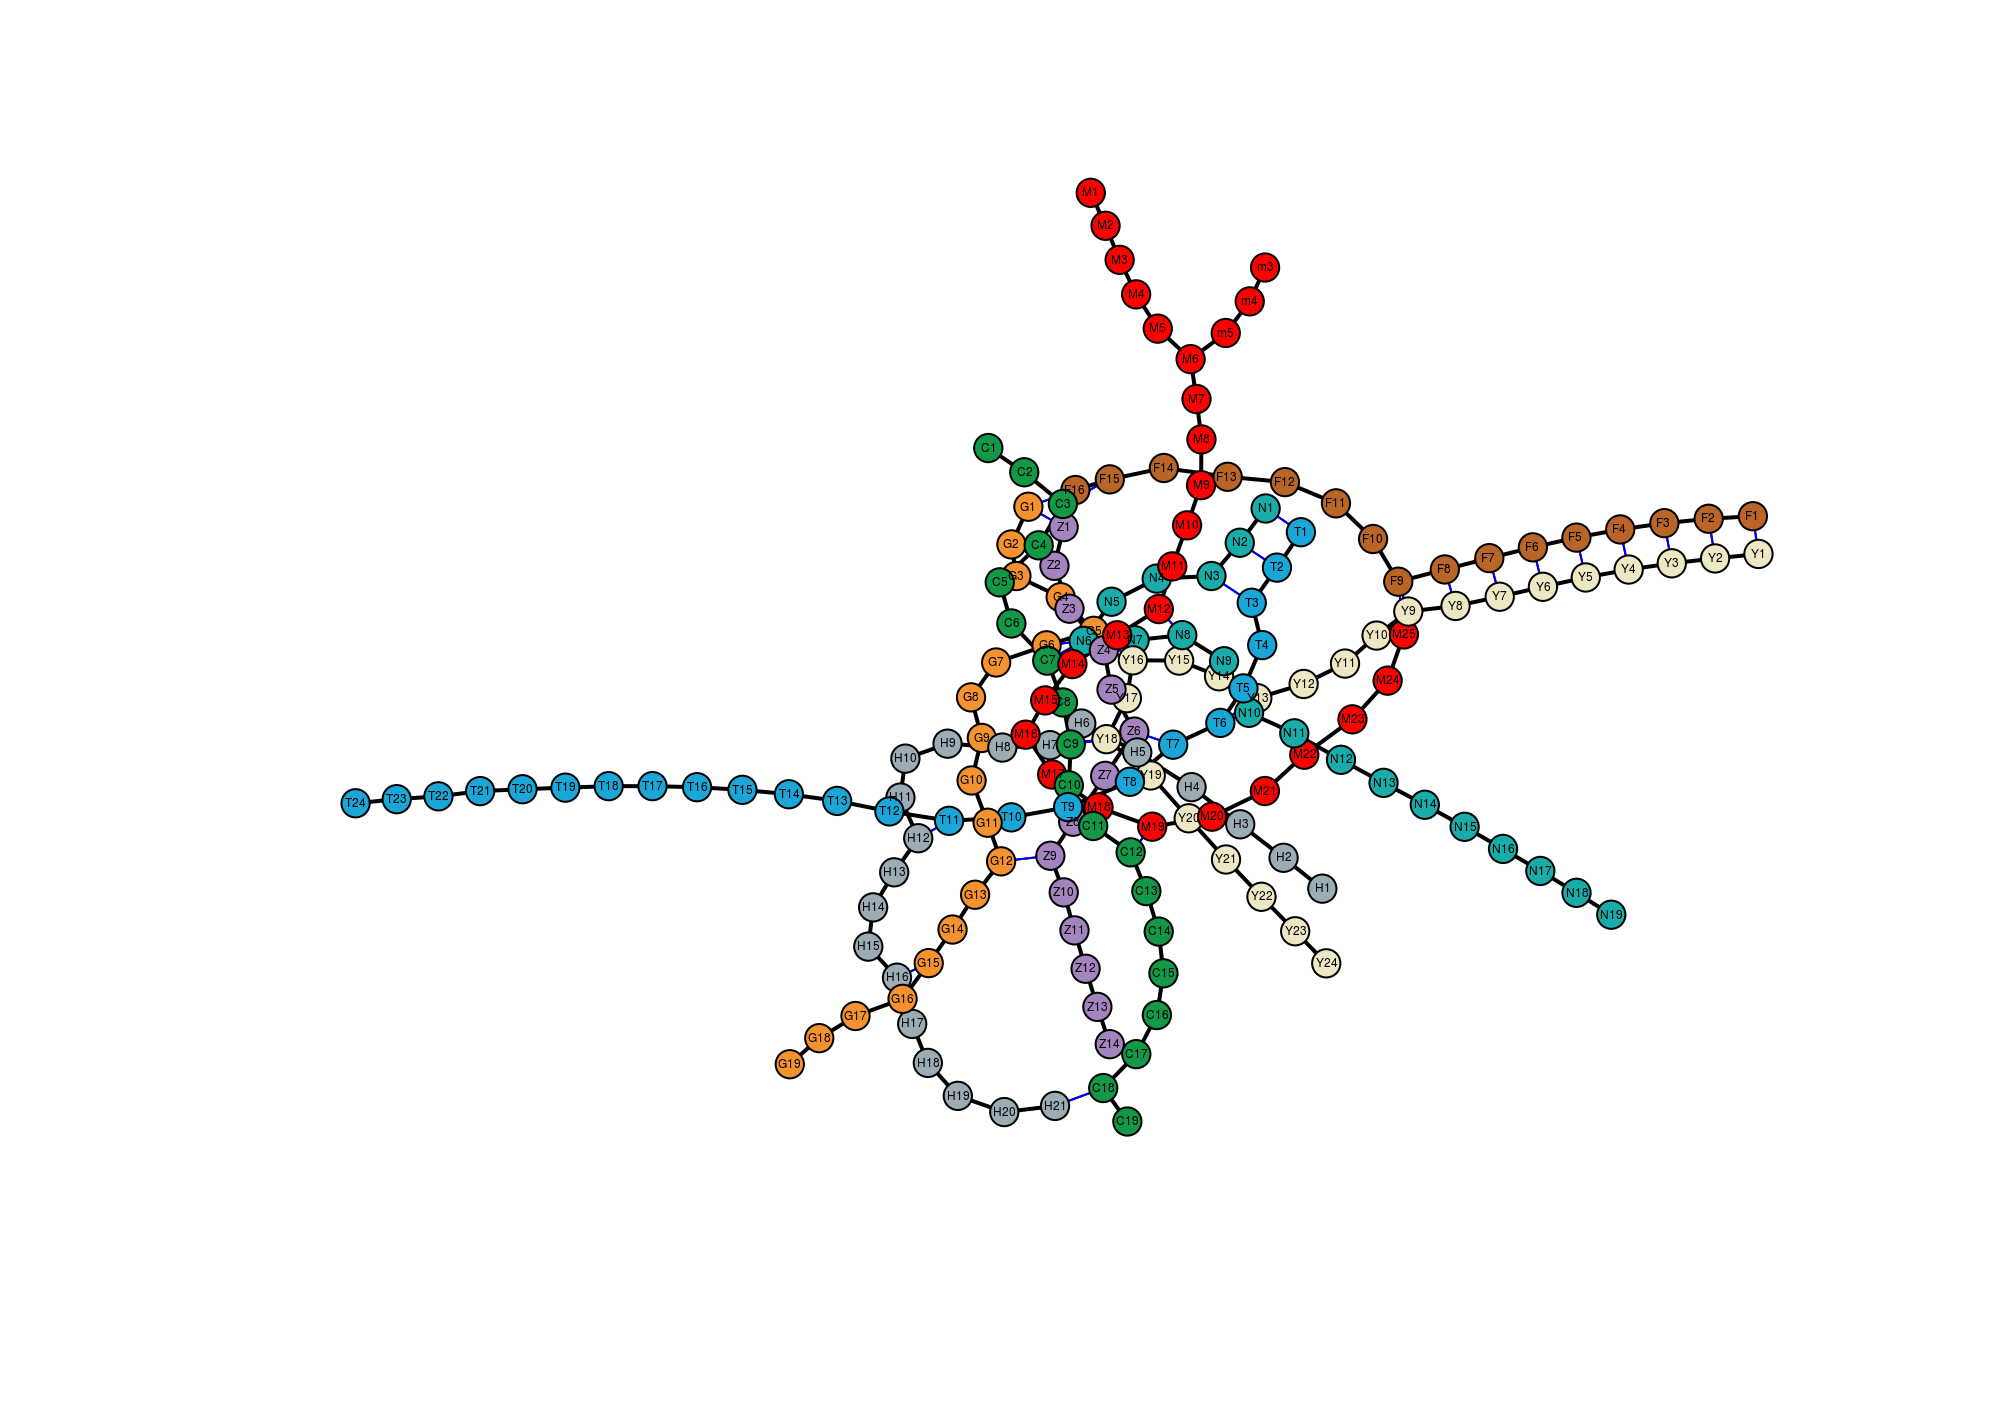

In [123]:
fig, ax = plt.subplots(1, 1, figsize=(14, 10))

pos = nx.graphviz_layout(g, prog="neato")
nx.draw(g, pos, ax=ax, node_size=200, node_color=colors)
nx.draw_networkx_labels(g, pos=pos, ax=ax, font_size=6)
nx.draw_networkx_edges(g, pos=pos, ax=ax, edgelist=on_train, width=2)
nx.draw_networkx_edges(g, pos=pos, ax=ax, edgelist=on_foot, edge_color="blue")

# removing the default axis on all sides:
for side in ['bottom','right','top','left']:
    ax.spines[side].set_visible(False)

# removing the axis labels and ticks
ax.set_xticks([])
ax.set_yticks([])
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

fig.savefig("ch10-metro-graph.pdf")
fig.savefig("ch10-metro-graph.png")
fig.tight_layout()

In [124]:
#g.degree()

In [125]:
d_max = max(g.degree().values())

In [126]:
[(n, d) for (n, d) in g.degree().items() if d == d_max]

[(u'G5', 6), (u'Y16', 6), (u'Z4', 6), (u'N7', 6), (u'M13', 6)]

In [127]:
p = nx.shortest_path(g, "Y24", "C19")

In [128]:
np.array(p)

array([u'Y24', u'Y23', u'Y22', u'Y21', u'Y20', u'Y19', u'Y18', u'C9',
       u'C10', u'C11', u'C12', u'C13', u'C14', u'C15', u'C16', u'C17',
       u'C18', u'C19'], 
      dtype='<U3')

In [129]:
np.sum([g[p[n]][p[n+1]]["weight"] for n in range(len(p)-1) if "weight" in g[p[n]][p[n+1]]])

35

In [130]:
h = g.copy()

In [131]:
for n1, n2 in h.edges_iter():
    if "transfer" in h[n1][n2]:
        h[n1][n2]["weight"] = 5

In [132]:
p = nx.shortest_path(h, "Y24", "C19")

In [133]:
np.array(p)

array([u'Y24', u'Y23', u'Y22', u'Y21', u'Y20', u'Y19', u'Y18', u'C9',
       u'C10', u'C11', u'C12', u'C13', u'C14', u'C15', u'C16', u'C17',
       u'C18', u'C19'], 
      dtype='<U3')

In [134]:
np.sum([h[p[n]][p[n+1]]["weight"] for n in range(len(p)-1)])

85

In [135]:
p = nx.shortest_path(h, "Z1", "H16")

In [136]:
np.sum([h[p[n]][p[n+1]]["weight"] for n in range(len(p)-1)])

65

In [137]:
A = nx.to_scipy_sparse_matrix(g)

In [138]:
A

<184x184 sparse matrix of type '<type 'numpy.int64'>'
	with 486 stored elements in Compressed Sparse Row format>

In [139]:
perm = sp.csgraph.reverse_cuthill_mckee(A)

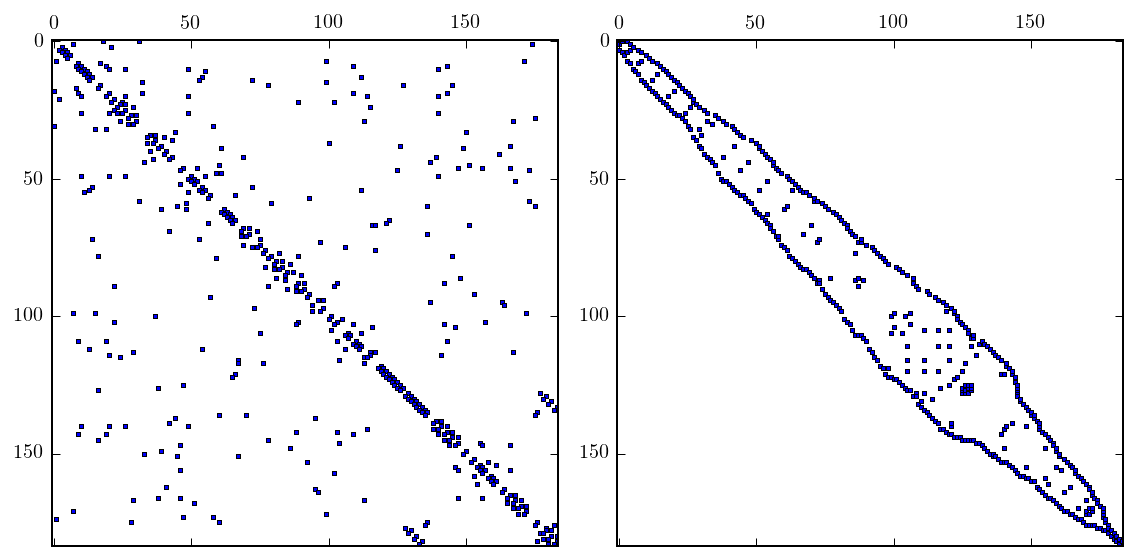

In [140]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.spy(A, markersize=2)
ax2.spy(sp_permute(A, perm, perm), markersize=2)
fig.tight_layout()
fig.savefig("ch12-rcm-graph.pdf")

## Versions

In [141]:
%reload_ext version_information

In [142]:
%version_information numpy, scipy, matplotlib, networkx, pygraphviz

Software,Version
Python,2.7.10 64bit [GCC 4.2.1 (Apple Inc. build 5577)]
IPython,3.2.1
OS,Darwin 14.1.0 x86_64 i386 64bit
numpy,1.9.2
scipy,0.16.0
matplotlib,1.4.3
networkx,1.9.1
pygraphviz,1.2
